In [296]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import math

from sklearn import metrics
from sklearn.linear_model import LinearRegression

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder, StandardScaler

from sklearn.compose import ColumnTransformer

In [297]:
dataset = pd.read_csv('datasets/cars.csv')
dataset.drop('Id', axis=1, inplace=True)
dataset.tail()

,year,brand,full_model_name,model_name,price,distance_travelled(kms),fuel_type,city,brand_rank,car_age
1720,2015,Hyundai,Hyundai Eon Era +,Eon,290000.0,38000.0,Petrol,Pune,14,6.0
1721,2011,Bentley,Bentley Continental Flying Spur W12,Continental,7500000.0,36000.0,Petrol,Pune,44,10.0
1722,2008,Mahindra-Renault,Mahindra-Renault Logan DLE 1.5 dci,Logan,185000.0,142522.0,Diesel,Pune,24,13.0
1723,1990,Mahindra,Mahindra Jeep CJ 500 D,Jeep,325000.0,18581.0,Diesel,Pune,24,31.0
1724,2017,Hyundai,Hyundai Creta SX Plus 1.6 AT CRDI,Creta,1395000.0,31028.0,Diesel,Pune,14,4.0


In [298]:
dataset.isnull().sum()

year                       0
brand                      0
full_model_name            0
model_name                 0
price                      0
distance_travelled(kms)    0
fuel_type                  0
city                       0
brand_rank                 0
car_age                    0
dtype: int64

In [299]:
len(dataset['brand'].unique())

31

In [300]:
len(dataset['model_name'].unique())

169

In [301]:
len(dataset['year'].unique())

19

In [302]:
len(dataset['city'].unique())

15

In [303]:
dataset.groupby('fuel_type')['price'].count()

fuel_type
CNG + 1         8
Diesel        922
Hybrid          1
Petrol        788
Petrol + 1      6
Name: price, dtype: int64

In [304]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1725 entries, 0 to 1724
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   year                     1725 non-null   int64  
 1   brand                    1725 non-null   object 
 2   full_model_name          1725 non-null   object 
 3   model_name               1725 non-null   object 
 4   price                    1725 non-null   float64
 5   distance_travelled(kms)  1725 non-null   float64
 6   fuel_type                1725 non-null   object 
 7   city                     1725 non-null   object 
 8   brand_rank               1725 non-null   int64  
 9   car_age                  1725 non-null   float64
dtypes: float64(3), int64(2), object(5)
memory usage: 134.9+ KB


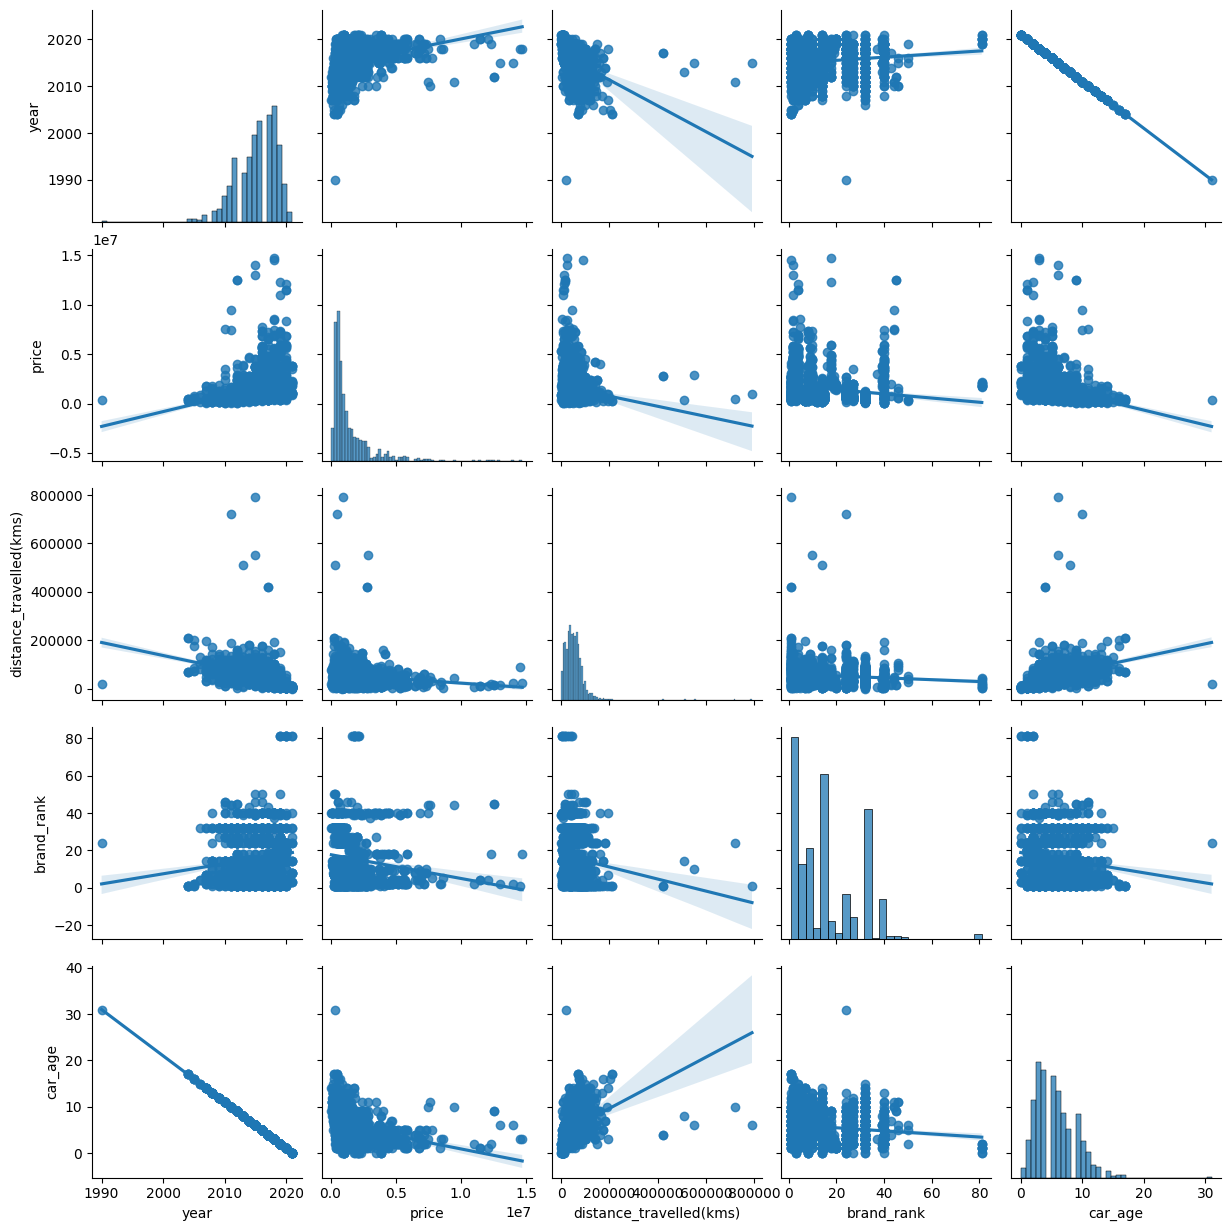

In [305]:
sns.pairplot(dataset, kind='reg')

In [306]:
le = LabelEncoder()
dataset['year'] = le.fit_transform(dataset['year'])
dataset['year'].describe()

count    1725.000000
mean       12.398261
std         3.162772
min         0.000000
25%        10.000000
50%        13.000000
75%        15.000000
max        18.000000
Name: year, dtype: float64

In [307]:
dataset['brand_rank'].describe()

count    1725.000000
mean       15.731014
std        12.951122
min         1.000000
25%         5.000000
50%        14.000000
75%        24.000000
max        81.000000
Name: brand_rank, dtype: float64

In [308]:
dataset.head(1)

,year,brand,full_model_name,model_name,price,distance_travelled(kms),fuel_type,city,brand_rank,car_age
0,13,Honda,Honda Brio S MT,Brio,425000.0,9680.0,Petrol,Mumbai,7,5.0


In [309]:
y = dataset['price'].values

dataset.drop(['full_model_name', 'model_name', 'price', 'brand', 'city'], inplace=True, axis=1)

dataset.head(1)

,year,distance_travelled(kms),fuel_type,brand_rank,car_age
0,13,9680.0,Petrol,7,5.0


In [310]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1725 entries, 0 to 1724
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   year                     1725 non-null   int64  
 1   distance_travelled(kms)  1725 non-null   float64
 2   fuel_type                1725 non-null   object 
 3   brand_rank               1725 non-null   int64  
 4   car_age                  1725 non-null   float64
dtypes: float64(2), int64(2), object(1)
memory usage: 67.5+ KB


In [311]:
ct = ColumnTransformer(transformers=[
     ('FuelTypeEncoder', OneHotEncoder(drop='first', sparse_output=False), [2])
    ], remainder='passthrough')

X = ct.fit_transform(dataset)
X.shape

(1725, 8)

In [312]:
ct.get_feature_names_out()

array(['FuelTypeEncoder__fuel_type_Diesel',
       'FuelTypeEncoder__fuel_type_Hybrid',
       'FuelTypeEncoder__fuel_type_Petrol',
       'FuelTypeEncoder__fuel_type_Petrol + 1', 'remainder__year',
       'remainder__distance_travelled(kms)', 'remainder__brand_rank',
       'remainder__car_age'], dtype=object)

In [313]:
len(ct.get_feature_names_out())

8

In [314]:
print("X: ", X, "\n\ny: ", y)

X:  [[0.00e+00 0.00e+00 1.00e+00 ... 9.68e+03 7.00e+00 5.00e+00]
 [1.00e+00 0.00e+00 0.00e+00 ... 1.19e+05 1.10e+01 9.00e+00]
 [1.00e+00 0.00e+00 0.00e+00 ... 6.46e+04 1.00e+00 4.00e+00]
 ...
 [1.00e+00 0.00e+00 0.00e+00 ... 1.43e+05 2.40e+01 1.30e+01]
 [1.00e+00 0.00e+00 0.00e+00 ... 1.86e+04 2.40e+01 3.10e+01]
 [1.00e+00 0.00e+00 0.00e+00 ... 3.10e+04 1.40e+01 4.00e+00]] 

y:  [ 425000.  325000. 2650000. ...  185000.  325000. 1395000.]


In [315]:
import statsmodels.api as sm

X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.187
Model:                            OLS   Adj. R-squared:                  0.183
Method:                 Least Squares   F-statistic:                     49.41
Date:                Sat, 18 May 2024   Prob (F-statistic):           4.01e-72
Time:                        22:11:08   Log-Likelihood:                -26986.
No. Observations:                1725   AIC:                         5.399e+04
Df Residuals:                    1716   BIC:                         5.404e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -3.546e+05    2.2e+06     -0.161      0.8

In [316]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [317]:
sc_x = StandardScaler()
X_train_scaled = sc_x.fit_transform(X_train)
X_train

array([[1.00e+00, 0.00e+00, 0.00e+00, ..., 9.10e+04, 1.00e+00, 7.00e+00],
       [0.00e+00, 0.00e+00, 1.00e+00, ..., 3.70e+04, 1.40e+01, 3.00e+00],
       [0.00e+00, 0.00e+00, 1.00e+00, ..., 1.25e+04, 3.20e+01, 2.00e+00],
       ...,
       [0.00e+00, 0.00e+00, 1.00e+00, ..., 7.50e+04, 3.20e+01, 1.30e+01],
       [1.00e+00, 0.00e+00, 0.00e+00, ..., 1.56e+04, 2.00e+00, 3.00e+00],
       [1.00e+00, 0.00e+00, 0.00e+00, ..., 8.13e+04, 1.00e+01, 3.00e+00]])

In [318]:
sc_y = StandardScaler()
y_train_scaled = sc_y.fit_transform(y_train.reshape(-1, 1))
y_train_scaled

array([[-0.31],
       [-0.07],
       [-0.46],
       ...,
       [-0.74],
       [ 1.07],
       [ 0.73]])

In [319]:
X_test_scaled = sc_x.transform(X_test)
X_test_scaled

array([[-1.06, -0.03,  1.08, ..., -0.31, -0.13,  0.41],
       [-1.06, -0.03,  1.08, ..., -0.37, -1.14,  0.41],
       [-1.06, -0.03,  1.08, ..., -0.57, -0.67, -0.52],
       ...,
       [ 0.94, -0.03, -0.92, ..., -0.26, -1.14, -0.82],
       [ 0.94, -0.03, -0.92, ..., -0.61, -0.91, -1.13],
       [-1.06, -0.03,  1.08, ...,  0.42, -0.28,  0.41]])

LinearRegression - 21.37% Accuracy

In [320]:
# Train the Model on Traing Set (Multiple Linear Regression - More than one independant variable)
linear_regressor = LinearRegression()
linear_regressor.fit(X_train, y_train)

# Predict output on Test Set
y_pred = linear_regressor.predict(X_test)

# Calculate Metrics

print("MSE: ", metrics.mean_squared_error(y_test, y_pred))
print("RMSE: ", math.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("MAE: ", metrics.mean_absolute_error(y_test, y_pred))

print("R Squared: ", metrics.r2_score(y_test, y_pred)) #Model Performance

np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1)[:6, :])

MSE:  2639488026339.112
RMSE:  1624650.1242849526
MAE:  939311.6977653054
R Squared:  0.2137393210442391
[[ 963918.12  365000.  ]
 [1274086.93 1195000.  ]
 [1532028.87  575000.  ]
 [1733135.    900000.  ]
 [2096391.77 1675000.  ]
 [1946367.54 1050000.  ]]


K-Fold CV - Linear Regression

In [321]:
accuracies = cross_val_score(estimator = linear_regressor, X = X_train, y = y_train, cv = 10)
print(accuracies)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

[-0.02  0.18  0.27  0.13  0.01  0.28  0.27  0.15  0.22  0.14]
Accuracy: 16.24 %
Standard Deviation: 9.94 %


SVM - 21.5% Accuracy

In [322]:
from sklearn.svm import SVR
svr_regressor = SVR(kernel='rbf')
svr_regressor.fit(X_train_scaled, y_train_scaled.ravel())

# Predict output on Test Set
y_pred = svr_regressor.predict(X_test_scaled)
y_pred = sc_y.inverse_transform(y_pred.reshape(-1, 1))

# Calculate Metrics

print("MSE: ", metrics.mean_squared_error(y_test, y_pred))
print("RMSE: ", math.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("MAE: ", metrics.mean_absolute_error(y_test, y_pred))

print("R Squared: ", metrics.r2_score(y_test, y_pred)) #Model Performance

np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1)[:6, :])

MSE:  2633630059309.235
RMSE:  1622846.283327301
MAE:  769850.4934356848
R Squared:  0.21548431442486815
[[ 393718.94  365000.  ]
 [ 822135.8  1195000.  ]
 [ 840249.13  575000.  ]
 [1556834.81  900000.  ]
 [1149849.94 1675000.  ]
 [1341775.31 1050000.  ]]


K-Fold CV - SVM

In [323]:
accuracies = cross_val_score(estimator = svr_regressor, X = X_train_scaled, y = y_train_scaled.ravel(), cv = 10)
print(accuracies)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

[0.05 0.2  0.31 0.21 0.02 0.34 0.37 0.26 0.46 0.22]
Accuracy: 24.25 %
Standard Deviation: 12.98 %


GrisSearchCV - SVM

In [324]:
# Commenting not to run - Heavy process
'''
parameters = [{'C': [0.25, 0.5, 0.75, 1], 'kernel': ['linear']},
              {'C': [0.25, 0.5, 0.75, 1], 'kernel': ['rbf', 'poly', 'sigmoid'], 'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]}]

grid_search = GridSearchCV(estimator = svr_regressor, param_grid = parameters, cv = 10, scoring='r2', n_jobs=-1)
grid_search.fit(X_train_scaled, y_train_scaled.ravel())

best_score = grid_search.best_score_
best_parameters = grid_search.best_params_

print("Best Score: {:.2f} %".format(best_score*100))
print("Best Parameters:", best_parameters)
'''

## *Result* ##
'''
Best Score: 29.03 %
Best Parameters: {'C': 1, 'gamma': 0.9, 'kernel': 'rbf'}
'''

"\nBest Score: 29.03 %\nBest Parameters: {'C': 1, 'gamma': 0.9, 'kernel': 'rbf'}\n"

SVM with Hyper Parameter tuning by GridSearch CV - 27.45%

In [325]:
from sklearn.svm import SVR
svr_regressor = SVR(kernel='rbf', C=1, gamma=0.9)
svr_regressor.fit(X_train_scaled, y_train_scaled.ravel())

# Predict output on Test Set
y_pred = svr_regressor.predict(X_test_scaled)
y_pred = sc_y.inverse_transform(y_pred.reshape(-1, 1))

# Calculate Metrics

print("MSE: ", metrics.mean_squared_error(y_test, y_pred))
print("RMSE: ", math.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("MAE: ", metrics.mean_absolute_error(y_test, y_pred))

print("R Squared: ", metrics.r2_score(y_test, y_pred)) #Model Performance

np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1)[:6, :])

MSE:  2435253910299.111
RMSE:  1560530.0094195916
MAE:  717546.988430235
R Squared:  0.2745773521855517
[[ 368374.13  365000.  ]
 [1106044.56 1195000.  ]
 [ 954702.89  575000.  ]
 [3436721.82  900000.  ]
 [1345525.01 1675000.  ]
 [1661632.87 1050000.  ]]


Decision Tree - 45.3% Accuracy

In [326]:
from sklearn.tree import DecisionTreeRegressor
dtree_regressor = DecisionTreeRegressor(random_state=0)
dtree_regressor.fit(X_train, y_train)

# Predict output on Test Set
y_pred = dtree_regressor.predict(X_test)

# Calculate Metrics

print("MSE: ", metrics.mean_squared_error(y_test, y_pred))
print("RMSE: ", math.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("MAE: ", metrics.mean_absolute_error(y_test, y_pred))

print("R Squared: ", metrics.r2_score(y_test, y_pred)) #Model Performance

np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1)[:6, :])

MSE:  1835248007407.4072
RMSE:  1354713.256526047
MAE:  464292.7536231884
R Squared:  0.45330938047189073
[[ 385000.  365000.]
 [ 499000. 1195000.]
 [ 749000.  575000.]
 [ 740000.  900000.]
 [1425000. 1675000.]
 [1050000. 1050000.]]


K-Fold CV - Decision Tree

In [327]:
accuracies = cross_val_score(estimator = dtree_regressor, X = X_train, y = y_train, cv = 10)
print(accuracies)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

[ 0.22  0.19  0.23  0.51  0.61  0.82  0.16  0.66 -0.15  0.65]
Accuracy: 38.98 %
Standard Deviation: 28.72 %


RandomForestRegressor - 61.1% Accuracy

In [328]:
from sklearn.ensemble import RandomForestRegressor
random_forest_regressor = RandomForestRegressor(random_state=0)
random_forest_regressor.fit(X_train, y_train)

# Predict output on Test Set
y_pred = random_forest_regressor.predict(X_test)

# Calculate Metrics

print("MSE: ", metrics.mean_squared_error(y_test, y_pred))
print("RMSE: ", math.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("MAE: ", metrics.mean_absolute_error(y_test, y_pred))

print("R Squared: ", metrics.r2_score(y_test, y_pred)) #Model Performance

np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1)[:6, :])

MSE:  1303904840395.013
RMSE:  1141886.5269347094
MAE:  504182.0823765606
R Squared:  0.6115878932307113
[[ 414650.    365000.  ]
 [ 811226.67 1195000.  ]
 [ 779060.    575000.  ]
 [3607933.33  900000.  ]
 [1615068.57 1675000.  ]
 [1263750.   1050000.  ]]


K-Fold CV - Random Forest

In [329]:
accuracies = cross_val_score(estimator = random_forest_regressor, X = X_train, y = y_train, cv = 10)
print(accuracies)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

[0.57 0.44 0.53 0.66 0.63 0.79 0.68 0.72 0.72 0.78]
Accuracy: 65.02 %
Standard Deviation: 10.58 %


GridSearchCV - RandomForest

In [330]:
# Commenting not to run - Heavy process
'''
parameters = {'max_depth': [19,21], 'n_estimators': [25,50,75,100,125,150,200], 'min_samples_split': [2,3,4,5,6,7,8,9,10]}

grid_search = GridSearchCV(estimator = random_forest_regressor, param_grid = parameters, cv = 10, scoring='r2', n_jobs=-1)
grid_search.fit(X_train, y_train)

best_score = grid_search.best_score_
best_parameters = grid_search.best_params_

print("Best Score: {:.2f} %".format(best_score*100))
print("Best Parameters:", best_parameters)
'''
'''
{'max_depth': [2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31]}
Best Score: 65.09 %
Best Parameters: {'max_depth': 21}

{'max_depth': [19,21], 'n_estimators': [25,50,75,100,125,150,200], 'min_samples_split': [2,3,4,5,6,7,8,9,10]}
Best Score: 65.79 %
Best Parameters: {'max_depth': 19, 'min_samples_split': 3, 'n_estimators': 50}
'''

"\n{'max_depth': [2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31]}\nBest Score: 65.09 %\nBest Parameters: {'max_depth': 21}\n\n{'max_depth': [19,21], 'n_estimators': [25,50,75,100,125,150,200], 'min_samples_split': [2,3,4,5,6,7,8,9,10]}\nBest Score: 65.79 %\nBest Parameters: {'max_depth': 19, 'min_samples_split': 3, 'n_estimators': 50}\n"

RandomForestRegressor with Hyper Parameter tuning by GridSearch CV - 61.32%

In [331]:
from sklearn.ensemble import RandomForestRegressor
random_forest_regressor = RandomForestRegressor(random_state=0, max_depth=19, min_samples_split=3, n_estimators=50)
random_forest_regressor.fit(X_train, y_train)

# Predict output on Test Set
y_pred = random_forest_regressor.predict(X_test)

# Calculate Metrics

print("MSE: ", metrics.mean_squared_error(y_test, y_pred))
print("RMSE: ", math.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("MAE: ", metrics.mean_absolute_error(y_test, y_pred))

print("R Squared: ", metrics.r2_score(y_test, y_pred)) #Model Performance

np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1)[:6, :])

MSE:  1298186705351.3186
RMSE:  1139379.965310659
MAE:  513471.53440617357
R Squared:  0.6132912329302862
[[ 423586.67  365000.  ]
 [ 874631.9  1195000.  ]
 [ 812054.9   575000.  ]
 [3500122.22  900000.  ]
 [1656313.33 1675000.  ]
 [1280066.67 1050000.  ]]


AdaBoostRegressor with RandomForest - Accuracy - 61.57%

In [332]:
from sklearn.ensemble import AdaBoostRegressor

adaboost_regressor = AdaBoostRegressor(estimator=RandomForestRegressor(random_state=0), n_estimators=100, learning_rate=0.5, random_state=0)
adaboost_regressor.fit(X_train, y_train)

# Predict output on Test Set
y_pred = adaboost_regressor.predict(X_test)

# Calculate Metrics

print("MSE: ", metrics.mean_squared_error(y_test, y_pred))
print("RMSE: ", math.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("MAE: ", metrics.mean_absolute_error(y_test, y_pred))

print("R Squared: ", metrics.r2_score(y_test, y_pred)) #Model Performance

np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1)[:6, :])

MSE:  1289806849307.7053
RMSE:  1135696.636125909
MAE:  520996.09580439207
R Squared:  0.6157874561510982
[[ 484550.    365000.  ]
 [1096000.   1195000.  ]
 [1099350.    575000.  ]
 [3553450.    900000.  ]
 [1504326.67 1675000.  ]
 [1351090.   1050000.  ]]


XGBRegressor - 64.97% Accuracy

In [333]:
from xgboost import XGBRegressor
xgb_regressor = XGBRegressor()
xgb_regressor.fit(X_train, y_train)

# Predict output on Test Set
y_pred = xgb_regressor.predict(X_test)

# Calculate Metrics

print("MSE: ", metrics.mean_squared_error(y_test, y_pred))
print("RMSE: ", math.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("MAE: ", metrics.mean_absolute_error(y_test, y_pred))

print("R Squared: ", metrics.r2_score(y_test, y_pred)) #Model Performance

np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1)[:6, :])

MSE:  1175947016202.678
RMSE:  1084410.9074528336
MAE:  467754.6317934783
R Squared:  0.6497044539891657
[[ 432280.53  365000.  ]
 [ 924925.06 1195000.  ]
 [ 857855.56  575000.  ]
 [2987795.25  900000.  ]
 [1396172.88 1675000.  ]
 [1052341.25 1050000.  ]]
